In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Cleaned_data.csv")

# Label Encoder

In [3]:
# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the labels
df['label'] = label_encoder.fit_transform(df['label'])

# Map 'white' to 0 and other values to 1
df['label'] = df['label'].apply(lambda x: 0 if x == label_encoder.transform(['white'])[0] else 1)
df.head()

,length,weight,count,looped,neighbors,income,label
0,14,0.007812,1,0,2,2.440000e+08,1
1,2,0.750000,1,1,2,6.500000e+08,1
2,14,0.007812,1,0,2,4.089000e+09,0
3,2,1.000000,1,0,2,4.965000e+09,0
4,8,0.125000,1,0,2,2.700000e+08,1


# Train test split

In [4]:
X=df.drop("label",axis=1)
y=(df["label"]>0).astype('int')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=42,
                                   test_size=0.2,
                                   shuffle=True)

# Scaling the Data

In [6]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [9]:
X_train

,length,weight,count,looped,neighbors,income
44015,144,4.993309e-04,6947,0,2,1.000000e+08
65783,42,1.614772e+00,16,0,2,2.000500e+08
532,144,3.062538e-03,1666,0,2,2.845646e+08
16521,28,8.854167e-02,2,0,2,1.150000e+08
68460,18,1.250000e-01,1,0,1,4.589000e+09
...,...,...,...,...,...,...
6265,4,2.666667e-01,2,0,2,4.000000e+08
54886,100,9.313226e-10,2,0,2,9.999000e+07
76820,144,1.289646e-02,3765,0,1,1.200000e+08
860,0,5.000000e-01,1,0,2,4.000000e+08


In [10]:
X_train_scaled

,length,weight,count,looped,neighbors,income
0,2.447314,-0.615189,6.328039,-0.126655,-0.000575,-0.029754
1,0.261856,1.160322,-0.272476,-0.126655,-0.000575,-0.029266
2,2.447314,-0.612370,1.298849,-0.126655,-0.000575,-0.028853
3,-0.038109,-0.518353,-0.285808,-0.126655,-0.000575,-0.029681
4,-0.252370,-0.478253,-0.286761,-0.126655,-0.470719,-0.007841
...,...,...,...,...,...,...
66255,-0.552335,-0.322436,-0.285808,-0.126655,-0.000575,-0.028290
66256,1.504567,-0.615738,-0.285808,-0.126655,-0.000575,-0.029755
66257,2.447314,-0.601553,3.297764,-0.126655,-0.470719,-0.029657
66258,-0.638039,-0.065797,-0.286761,-0.126655,-0.000575,-0.028290


# ML Models 

In [11]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Support Vector Machine
svm_classifier = make_pipeline(StandardScaler(), SVC())
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)

In [13]:

# K-Nearest Neighbors
knn_classifier = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_params = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9]}
knn_grid = GridSearchCV(knn_classifier, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
knn_pred = knn_grid.predict(X_test)

C:\Users\SALMALIDAME\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SALMALIDAME\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

C:\Users\SALMALIDAME\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SALMALIDAME\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [14]:

# Random Forest
rf_classifier = RandomForestClassifier()
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_classifier, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_pred = rf_grid.predict(X_test)

In [15]:

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
gb_grid = GridSearchCV(gb_classifier, gb_params, cv=5)
gb_grid.fit(X_train, y_train)
gb_pred = gb_grid.predict(X_test)

In [16]:

# XGBoost
xgb_classifier = XGBClassifier()
xgb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
xgb_grid = GridSearchCV(xgb_classifier, xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
xgb_pred = xgb_grid.predict(X_test)

In [17]:

# Logistic Regression
lr_classifier = make_pipeline(StandardScaler(), LogisticRegression())
lr_params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
lr_grid = GridSearchCV(lr_classifier, lr_params, cv=5)
lr_grid.fit(X_train, y_train)
lr_pred = lr_grid.predict(X_test)

# Evaluation 

In [18]:
# Evaluate Logistic Regression
print("Logistic Regression:")
print(f'Accuracy: {accuracy_score(y_test, lr_pred)}')
print(f'Classification Report:\n{classification_report(y_test, lr_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, lr_pred)}')

Logistic Regression:
Accuracy: 0.8041772304720511
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      8290
           1       0.75      0.90      0.82      8276

    accuracy                           0.80     16566
   macro avg       0.82      0.80      0.80     16566
weighted avg       0.82      0.80      0.80     16566

Confusion Matrix:
[[5845 2445]
 [ 799 7477]]


In [19]:

print('_'*55)
# Evaluate Support Vector Machine
print("Support Vector Machine:")
print(f'Accuracy: {accuracy_score(y_test, svm_pred)}')
print(f'Classification Report:\n{classification_report(y_test, svm_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, svm_pred)}')
print('_'*55)

_______________________________________________________
Support Vector Machine:
Accuracy: 0.7907159241820596
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      8290
           1       0.76      0.85      0.80      8276

    accuracy                           0.79     16566
   macro avg       0.80      0.79      0.79     16566
weighted avg       0.80      0.79      0.79     16566

Confusion Matrix:
[[6037 2253]
 [1214 7062]]
_______________________________________________________


In [20]:

# Evaluate K-Nearest Neighbors
print("K-Nearest Neighbors:")
print(f'Accuracy: {accuracy_score(y_test, knn_pred)}')
print(f'Classification Report:\n{classification_report(y_test, knn_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, knn_pred)}')
print('_'*55)

K-Nearest Neighbors:
Accuracy: 0.849933598937583
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      8290
           1       0.84      0.87      0.85      8276

    accuracy                           0.85     16566
   macro avg       0.85      0.85      0.85     16566
weighted avg       0.85      0.85      0.85     16566

Confusion Matrix:
[[6866 1424]
 [1062 7214]]
_______________________________________________________


In [21]:

# Evaluate Random Forest
print("Random Forest:")
print(f'Accuracy: {accuracy_score(y_test, rf_pred)}')
print(f'Classification Report:\n{classification_report(y_test, rf_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, rf_pred)}')
print('_'*55)

Random Forest:
Accuracy: 0.8872992876976941
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      8290
           1       0.87      0.91      0.89      8276

    accuracy                           0.89     16566
   macro avg       0.89      0.89      0.89     16566
weighted avg       0.89      0.89      0.89     16566

Confusion Matrix:
[[7151 1139]
 [ 728 7548]]
_______________________________________________________


In [22]:

# Evaluate Gradient Boosting
print("Gradient Boosting:")
print(f'Accuracy: {accuracy_score(y_test, gb_pred)}')
print(f'Classification Report:\n{classification_report(y_test, gb_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, gb_pred)}')
print('_'*55)

Gradient Boosting:
Accuracy: 0.8793311602076542
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      8290
           1       0.86      0.91      0.88      8276

    accuracy                           0.88     16566
   macro avg       0.88      0.88      0.88     16566
weighted avg       0.88      0.88      0.88     16566

Confusion Matrix:
[[7046 1244]
 [ 755 7521]]
_______________________________________________________


In [23]:

# Evaluate XGBoost
print("XGBoost:")
print(f'Accuracy: {accuracy_score(y_test, xgb_pred)}')
print(f'Classification Report:\n{classification_report(y_test, xgb_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, xgb_pred)}')


XGBoost:
Accuracy: 0.8978630930822166
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      8290
           1       0.88      0.92      0.90      8276

    accuracy                           0.90     16566
   macro avg       0.90      0.90      0.90     16566
weighted avg       0.90      0.90      0.90     16566

Confusion Matrix:
[[7277 1013]
 [ 679 7597]]


In [24]:
models = ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors', 'Gradient Boosting', 'XGBoost', 'Random Forest']

predictions = [lr_pred, svm_pred, knn_pred, gb_pred, xgb_pred, rf_pred]


In [25]:
# Create a DataFrame for better visualization
metrics_data = {
    'Model': models,
    'Accuracy': [accuracy_score(y_test, pred) for pred in predictions],
    'Precision': [precision_score(y_test, pred, average='weighted') for pred in predictions],
    'Recall': [recall_score(y_test, pred, average='weighted') for pred in predictions],
    'F1 Score': [f1_score(y_test, pred, average='weighted') for pred in predictions]
}

In [26]:
metrics_table = pd.DataFrame(metrics_data)
print("Metrics Table:")
metrics_table

Metrics Table:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.804177,0.816713,0.804177,0.802242
1,Support Vector Machine,0.790716,0.795385,0.790716,0.789901
2,K-Nearest Neighbors,0.849934,0.850609,0.849934,0.849865
3,Gradient Boosting,0.879331,0.880664,0.879331,0.879229
4,XGBoost,0.897863,0.898515,0.897863,0.897823
5,Random Forest,0.887299,0.888260,0.887299,0.887232


In [27]:
true_labels = y_test
predicted_labels = [lr_pred, svm_pred, knn_pred, rf_pred, gb_pred, xgb_pred]

# Print confusion matrix for each model
for i, preds in enumerate(predicted_labels):
    model_name = models[i]
    cm = confusion_matrix(true_labels, preds)

    print(f"Confusion Matrix - {model_name}:\n")
    print(f"                Predicted Negative   Predicted Positive")
    print(f"Actual Negative      {cm[0, 0]}                  {cm[0, 1]}")
    print(f"Actual Positive      {cm[1, 0]}                  {cm[1, 1]}\n")

Confusion Matrix - Logistic Regression:

                Predicted Negative   Predicted Positive
Actual Negative      5845                  2445
Actual Positive      799                  7477

Confusion Matrix - Support Vector Machine:

                Predicted Negative   Predicted Positive
Actual Negative      6037                  2253
Actual Positive      1214                  7062

Confusion Matrix - K-Nearest Neighbors:

                Predicted Negative   Predicted Positive
Actual Negative      6866                  1424
Actual Positive      1062                  7214

Confusion Matrix - Gradient Boosting:

                Predicted Negative   Predicted Positive
Actual Negative      7151                  1139
Actual Positive      728                  7548

Confusion Matrix - XGBoost:

                Predicted Negative   Predicted Positive
Actual Negative      7046                  1244
Actual Positive      755                  7521

Confusion Matrix - Random Forest:

         

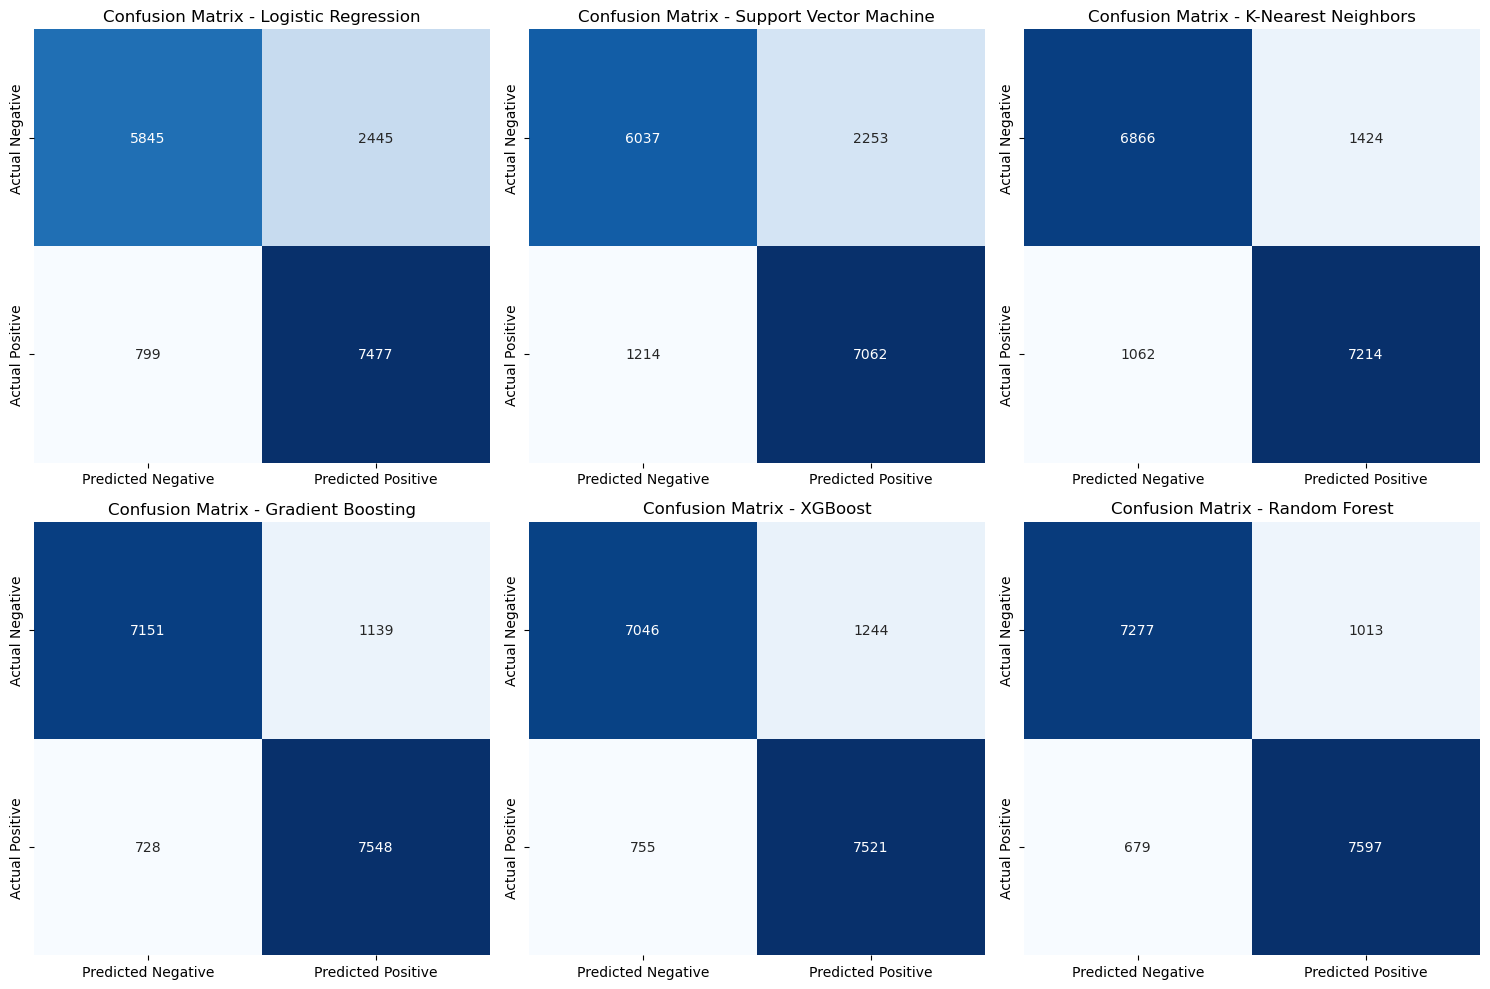

In [28]:
# Plot confusion matrix for each model
plt.figure(figsize=(15, 10))

for i, preds in enumerate(predicted_labels, 1):
    plt.subplot(2, 3, i)
    cm = confusion_matrix(true_labels, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {models[i-1]}')

plt.tight_layout()
plt.show()

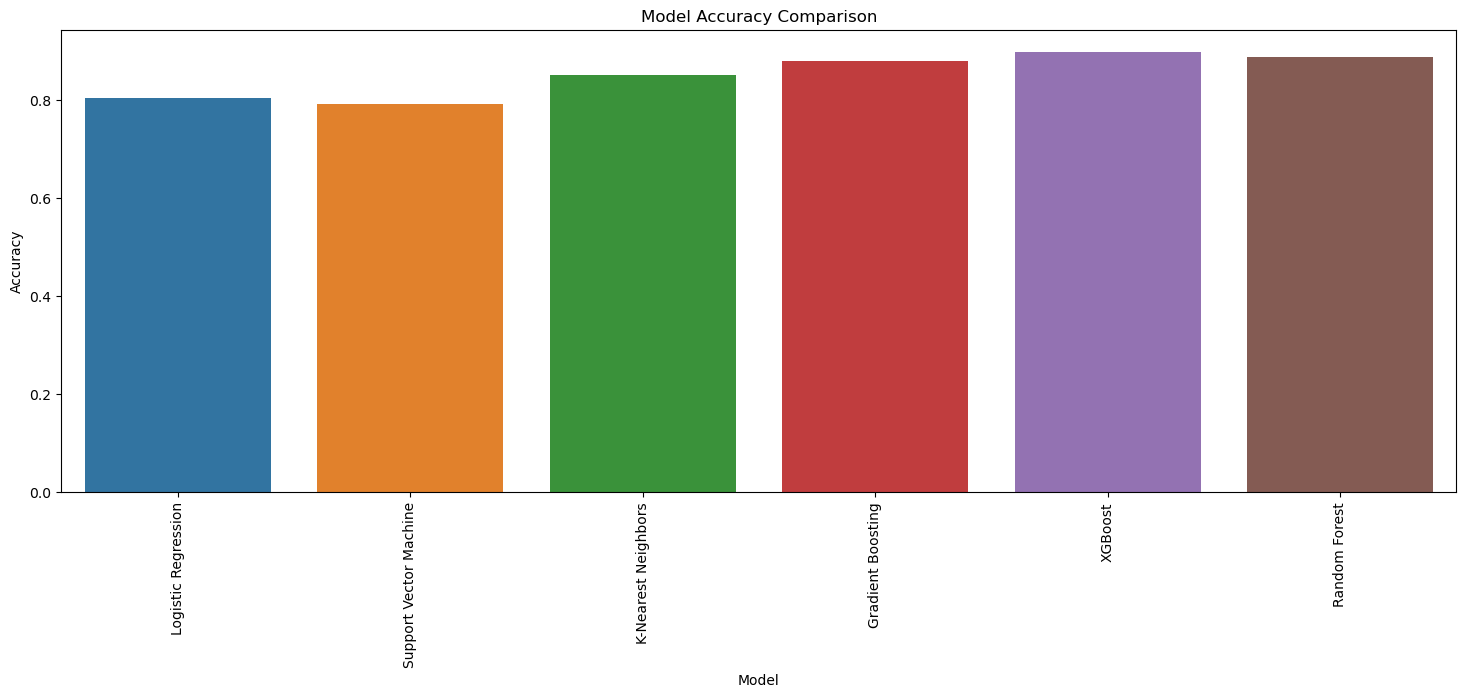

In [29]:
# Plot bar chart for Accuracy
plt.figure(figsize=(18,6))

sns.barplot(x=models, y=metrics_table['Accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.show()

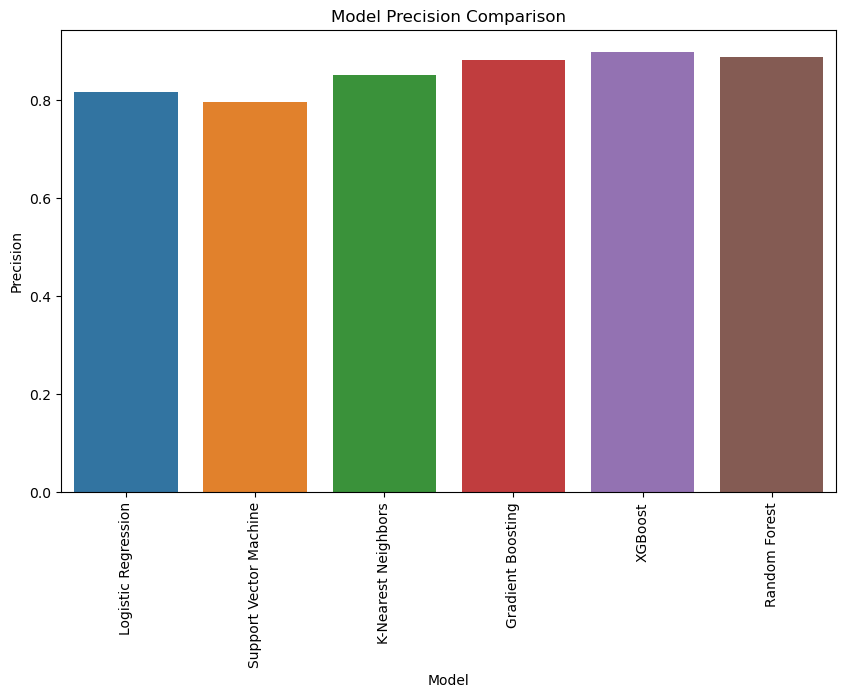

In [30]:
# Plot bar chart for Precision
plt.figure(figsize=(10, 6))

sns.barplot(x=models, y=metrics_table['Precision'])
plt.title('Model Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically
plt.show()